<a href="https://colab.research.google.com/github/sbarreto10/AnalisisNumerico/blob/main/LaboNumerico/Ordenes_de_precision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTIMACIÓN DEL ORDEN DE PRECISIÓN DE DISTINTOS MÉTODOS NUMÉRICOS DE RESOLUCIÓN DE ECUACIONES DIFERENCIALES CON CONDICIONES INICIALES

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# EL PROBLEMA ATACADO ES EL SIGUIENTE:
## $\frac{dy}{dt}=(1-2t)y$; $0<t<1.5$;
## $y(0)=1$

In [20]:
y = [math.e**(n-n**2) for n in np.arange(0,1.625,0.125)]

### El "ln(2)" en las expresiones que estiman los ordenes de precisión proviene de los distintos h con los que se realizan las aproximaciones para un mismo método, que se van reduciendo de a mitades
### $\frac{h_{old}}{h_{new}} = 2$

# EULER PURAMENTE EXPLÍCITO

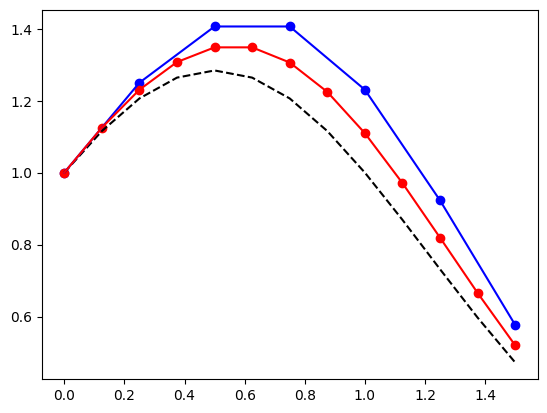

In [21]:
u, t, h = 1, 0, 0.25
U1 = [u]
while t<1.5:
  u = u + h*((1-2*t)*u)
  U1.append(u)
  t += h

u, t, h = 1, 0, 0.125
U2 = [u]
while t<1.5:
  u = u + h*((1-2*t)*u)
  U2.append(u)
  t += h

plt.plot(np.arange(0,1.625,0.125),y,c="black",ls="--")
plt.plot(np.arange(0,1.75,0.25),U1,c="blue")
plt.scatter(np.arange(0,1.75,0.25),U1,c="blue")
plt.plot(np.arange(0,1.625,0.125),U2,c="red")
plt.scatter(np.arange(0,1.625,0.125),U2,c="red")

In [22]:
e1=abs(U1[-1]-y[-1])
e2=abs(U2[-1]-y[-1])
print("ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = "+str(np.log(e1/e2)/np.log(2))+" ≈ "+str(round(np.log(e1/e2)/np.log(2))))

ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = 1.1313344943970822 ≈ 1


# EULER PURAMENTE IMPLÍCITO

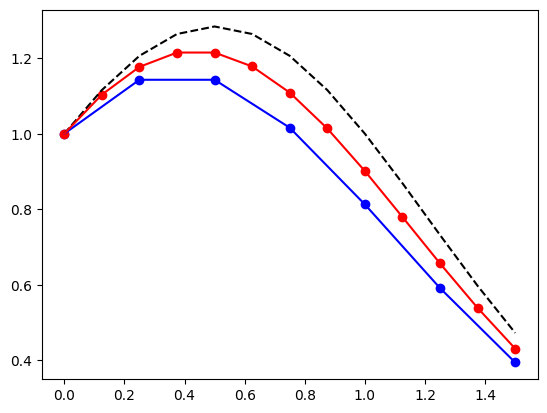

In [23]:
u, t, h = 1, 0, 0.25
U1 = [u]
while t<1.5:
  u = u/(1+h*(2*(t+h)-1))
  U1.append(u)
  t += h

u, t, h = 1, 0, 0.125
U2 = [u]
while t<1.5:
  u = u/(1+h*(2*(t+h)-1))
  U2.append(u)
  t += h

plt.plot(np.arange(0,1.625,0.125),y,c="black",ls="--")
plt.plot(np.arange(0,1.75,0.25),U1,c="blue")
plt.scatter(np.arange(0,1.75,0.25),U1,c="blue")
plt.plot(np.arange(0,1.625,0.125),U2,c="red")
plt.scatter(np.arange(0,1.625,0.125),U2,c="red")

In [24]:
e1=abs(U1[-1]-y[-1])
e2=abs(U2[-1]-y[-1])
print("ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = "+str(np.log(e1/e2)/np.log(2))+" ≈ "+str(round(np.log(e1/e2)/np.log(2))))

ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = 0.9148413556940485 ≈ 1


# CRANK NICOLOSON

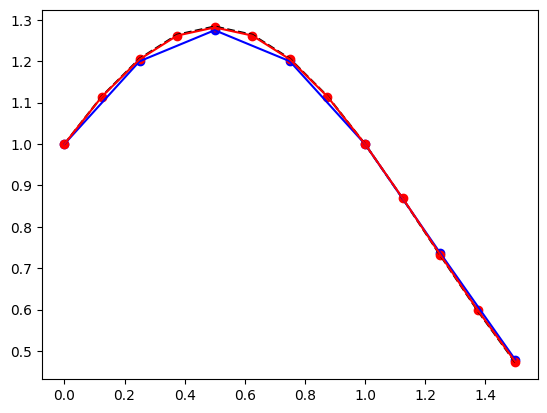

In [25]:
u, t, h = 1, 0, 0.25
U1 = [u]
while t<1.5:
  u = (u*(1+0.5*h*(1-2*t)))/(1+0.5*h*(2*(t+h)-1))
  U1.append(u)
  t += h

u, t, h = 1, 0, 0.125
U2 = [u]
while t<1.5:
  u = (u*(1+0.5*h*(1-2*t)))/(1+0.5*h*(2*(t+h)-1))
  U2.append(u)
  t += h

plt.plot(np.arange(0,1.625,0.125),y,c="black",ls="--")
plt.plot(np.arange(0,1.75,0.25),U1,c="blue")
plt.scatter(np.arange(0,1.75,0.25),U1,c="blue")
plt.plot(np.arange(0,1.625,0.125),U2,c="red")
plt.scatter(np.arange(0,1.625,0.125),U2,c="red")

In [26]:
e1=abs(U1[-1]-y[-1])
e2=abs(U2[-1]-y[-1])
print("ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = "+str(np.log(e1/e2)/np.log(2))+" ≈ "+str(round(np.log(e1/e2)/np.log(2))))

ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = 2.020218705031989 ≈ 2


# RK2

In [27]:
def RK2_k(u, t, h):
  k1 = (1-2*t)*u
  k2 = (1-2*(t+h))*(u+h*k1)
  return k1, k2

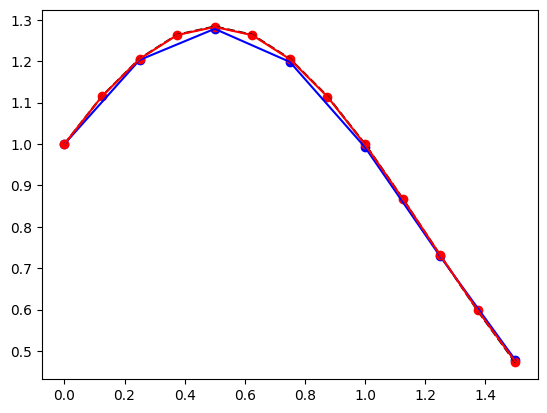

In [28]:
u, t, h = 1, 0, 0.25
U1 = [u]
while t<1.5:
  K = RK2_k(u, t, h)
  u = u + 0.5*h*(K[0]+K[1])
  U1.append(u)
  t += h

u, t, h = 1, 0, 0.125
U2 = [u]
while t<1.5:
  K = RK2_k(u, t, h)
  u = u + 0.5*h*(K[0]+K[1])
  U2.append(u)
  t += h

plt.plot(np.arange(0,1.625,0.125),y,c="black",ls="--")
plt.plot(np.arange(0,1.75,0.25),U1,c="blue")
plt.scatter(np.arange(0,1.75,0.25),U1,c="blue")
plt.plot(np.arange(0,1.625,0.125),U2,c="red")
plt.scatter(np.arange(0,1.625,0.125),U2,c="red")

In [29]:
e1=abs(U1[-1]-y[-1])
e2=abs(U2[-1]-y[-1])
print("ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = "+str(np.log(e1/e2)/np.log(2))+" ≈ "+str(round(np.log(e1/e2)/np.log(2))))

ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = 1.5963922903638883 ≈ 2


# RK4

In [30]:
def RK4_k(u, t, h):
  k1 = (1-2*t)*u
  k2 = (1-2*(t+0.5*h))*(u+0.5*h*k1)
  k3 = (1-2*(t+0.5*h))*(u+0.5*h*k2)
  k4 = (1-2*(t+h))*(u+h*k3)
  return k1, k2, k3, k4

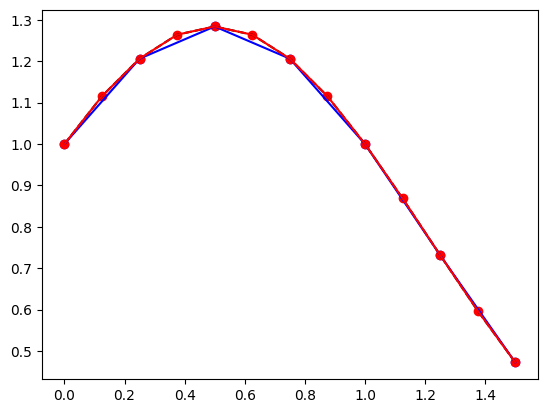

In [31]:
u, t, h = 1, 0, 0.25
U1 = [u]
while t<1.5:
  K = RK4_k(u, t, h)
  u = u + (1/6)*h*(K[0]+2*(K[1]+K[2])+K[3])
  U1.append(u)
  t += h

u, t, h = 1, 0, 0.125
U2 = [u]
while t<1.5:
  K = RK4_k(u, t, h)
  u = u + (1/6)*h*(K[0]+2*(K[1]+K[2])+K[3])
  U2.append(u)
  t += h

plt.plot(np.arange(0,1.625,0.125),y,c="black",ls="--")
plt.plot(np.arange(0,1.75,0.25),U1,c="blue")
plt.scatter(np.arange(0,1.75,0.25),U1,c="blue")
plt.plot(np.arange(0,1.625,0.125),U2,c="red")
plt.scatter(np.arange(0,1.625,0.125),U2,c="red")

In [32]:
e1=abs(U1[-1]-y[-1])
e2=abs(U2[-1]-y[-1])
print("ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = "+str(np.log(e1/e2)/np.log(2))+" ≈ "+str(round(np.log(e1/e2)/np.log(2))))

ORDEN DE PRECISIÓN: ln(e[h=0.25]/e[0.125])/ln(2) = 3.78614114119822 ≈ 4
